In [24]:
import geopandas as gpd
import movingpandas as mpd
from datetime import datetime
from pyproj import CRS
import holoviews as hv

In [2]:
iceberg_name = "a69a"

In [3]:
df = gpd.read_file(f'data/stats_database_v5/stats/{iceberg_name}.csv')

In [4]:
df.crs = 'epsg:4326'

In [5]:
df['geometry'] = gpd.GeoSeries.from_xy(df['lon'], df['lat'], crs='epsg:4326')
df.head()

,date,date_gap,disp,flags,lat,lon,mask,size,vel_angle,geometry
0,2020191,0,0,6,-69.015,-60.503,0,1924.42,0,POINT (-60.50300 -69.01500)
1,2020192,1,6.369,6,-68.959,-60.529,0,1922.42,0,POINT (-60.52900 -68.95900)
2,2020193,1,3.557,7,-68.99,-60.547,0,1920.42,0,POINT (-60.54700 -68.99000)
3,2020194,1,0.18,7,-68.989,-60.549,0,1918.42,0,POINT (-60.54900 -68.98900)
4,2020195,1,0.276,7,-68.987,-60.553,0,1916.42,0,POINT (-60.55300 -68.98700)


<AxesSubplot:>

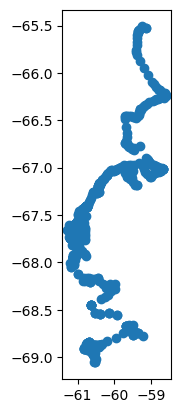

In [6]:
df.plot()

In [7]:
type(df.date[0])

str

In [8]:
df.date = [datetime.strptime(date, '%Y%j') for date in df.date]
# df.date = datetime.strptime(x, '%Y-%m-%d') for x in df.date

In [9]:
df.head()

,date,date_gap,disp,flags,lat,lon,mask,size,vel_angle,geometry
0,2020-07-09,0,0,6,-69.015,-60.503,0,1924.42,0,POINT (-60.50300 -69.01500)
1,2020-07-10,1,6.369,6,-68.959,-60.529,0,1922.42,0,POINT (-60.52900 -68.95900)
2,2020-07-11,1,3.557,7,-68.99,-60.547,0,1920.42,0,POINT (-60.54700 -68.99000)
3,2020-07-12,1,0.18,7,-68.989,-60.549,0,1918.42,0,POINT (-60.54900 -68.98900)
4,2020-07-13,1,0.276,7,-68.987,-60.553,0,1916.42,0,POINT (-60.55300 -68.98700)


In [30]:
date_range = str(df['date'].dt.date.min()) + \
    ' to ' + str(df['date'].dt.date.max())
print(date_range)

2020-07-09 to 2022-04-25


In [16]:
traj = mpd.Trajectory(df, iceberg_name, t='date', x='lon', y='lat', crs='epsg:4326')

In [11]:
traj.df.head()

,date_gap,disp,flags,lat,lon,mask,size,vel_angle,geometry
date,,,,,,,,,
2020-07-09,0,0,6,-69.015,-60.503,0,1924.42,0,POINT (-60.50300 -69.01500)
2020-07-10,1,6.369,6,-68.959,-60.529,0,1922.42,0,POINT (-60.52900 -68.95900)
2020-07-11,1,3.557,7,-68.99,-60.547,0,1920.42,0,POINT (-60.54700 -68.99000)
2020-07-12,1,0.18,7,-68.989,-60.549,0,1918.42,0,POINT (-60.54900 -68.98900)
2020-07-13,1,0.276,7,-68.987,-60.553,0,1916.42,0,POINT (-60.55300 -68.98700)


In [32]:
traj.to_crs(CRS(3031))

Trajectory a69a (2020-07-09 00:00:00 to 2022-04-25 00:00:00) | Size: 635 | Length: 1333720.2m
Bounds: (-2320609.231999168, 1129288.4292525654, -2002610.8194267426, 1385050.0725634957)
LINESTRING (-2006121.6354085808 1134870.3515995552, -2012108.6408778958 1137052.2658700822, -2009435

In [33]:
traj.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
traj.hvplot()

# WHYYYY IT NO WORK WITH ANTARCTIC CRS AAAA

c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


:Overlay
   .Tiles.I :Tiles   [x,y]
   .Path.I  :Path   [Longitude,Latitude]

Speed

In [28]:
traj.add_speed(overwrite=True)
# berg_plot = traj.hvplot(title=(f"Track and speed of Antarctic iceberg {iceberg_name} (Antarctic Peninsula) Date: "+str(date_range)), c='speed_kmh', line_width=2.5, cmap='Plasma',
#             colorbar=True, width=700, height=500, xlabel="Longitude", ylabel="Latitude")

c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [35]:
traj.df['speed_kmh'] = traj.df['speed']*3.6

In [37]:
traj.df.head(2)

,date_gap,disp,flags,lat,lon,mask,size,vel_angle,geometry,speed,speed_kmh
date,,,,,,,,,,,
2020-07-09,0,0,6,-69.015,-60.503,0,1924.42,0,POINT (-60.50300 -69.01500),0.073297,0.263869
2020-07-10,1,6.369,6,-68.959,-60.529,0,1922.42,0,POINT (-60.52900 -68.95900),0.073297,0.263869


In [41]:
berg_plot = traj.hvplot(title=(f"Track and speed of Antarctic iceberg {iceberg_name} from "+str(date_range)), c='speed_kmh', clabel="Speed (km/h)", line_width=2.5, cmap='Plasma',
            colorbar=True, width=700, height=500, xlabel="Longitude", ylabel="Latitude")

c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [42]:
hv.save(berg_plot, f"iceberg{iceberg_name}.png", fmt='png')